<a href="https://colab.research.google.com/github/PrathameshKR/ML-projects/blob/main/DL-models/MNIST_digit_classification_using_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries/Dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
import warnings
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

warnings.filterwarnings("ignore")

###Loading the MNIST dataset
note :- the data processing part is already done and it is ready in train test split format
* grayscale images
* train split: 60000
* test split: 10000
* img dim: 28 x 28

In [ ]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
#checking values by picking a random image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

3


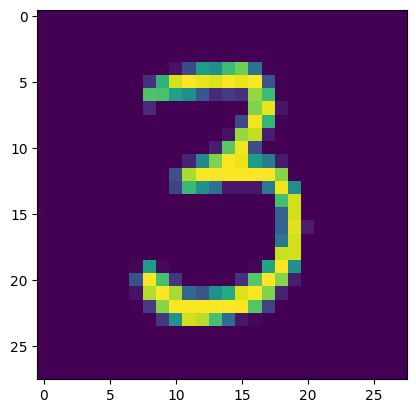

In [ ]:
#converting this numpy array to img
plt.imshow(X_train[50])

#printing the coresponding label
print(Y_train[50])

###Image Labels

In [ ]:
#checking unique values in Y_train
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


* we can use these labels as such or we can also apply one hot encoding
* all the images have the same dimension in this dataset, if not, we have to resize all the images to a common dimension

In [ ]:
#scaling the values
X_train = X_train/255
X_test = X_test/255
#this way all the values will lie between 0 and 1

In [ ]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
X_train.shape

(60000, 28, 28)

###Building the neural network

In [ ]:
#setting up layers of the neural network
model = keras.Sequential([keras.layers.Input(shape=(28,28)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(50,activation='relu'),
                          keras.layers.Dense(50,activation='relu'),
                          keras.layers.Dense(10,activation='sigmoid')])

In [ ]:
#compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#training our neural network
history = model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8496 - loss: 0.5146
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9542 - loss: 0.1520
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9675 - loss: 0.1090
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9747 - loss: 0.0838
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9795 - loss: 0.0690
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9833 - loss: 0.0571
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9856 - loss: 0.0490
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9875 - loss: 0.0416
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9891 - loss: 0.0362
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9903 - loss: 0.0315


###Accuracy on test data

In [ ]:
loss,accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9676 - loss: 0.1284
0.9706000089645386


In [ ]:
#checking test values for ourselves
print(Y_test[0])

7


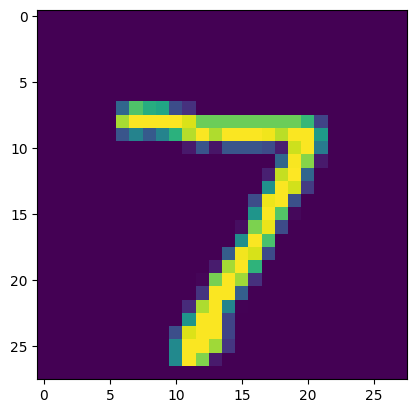

In [ ]:
plt.imshow(X_test[0])

In [ ]:
#checking if model predicts the same for above datapoint
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
#converting prediction probabilites to class labels
Y_pred_labels = [np.argmax(i) for i in Y_pred]

In [ ]:
print(Y_pred_labels[0])

7


In [ ]:
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

* Y_test --> true labels
* Y_pred_labels --> predicted labels

##Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(Y_test,Y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 961    0    2    2    1    1    1    0    1   11]
 [   0 1119    1    3    2    1    4    1    4    0]
 [   4    3  977   19    1    0    4   12   10    2]
 [   0    0    0  992    2    3    0    4    3    6]
 [   1    1    0    0  949    2    9    5    2   13]
 [   3    0    1   17    1  856    4    0    7    3]
 [   6    2    1    1    3    9  933    0    3    0]
 [   1    1    4    5    3    1    0  992    4   17]
 [   5    0    2    4    3    5    1    0  948    6]
 [   1    1    0    6   11    3    0    2    8  977]], shape=(10, 10), dtype=int32)


Text(0.5, 58.7222222222222, 'Predicted labels')

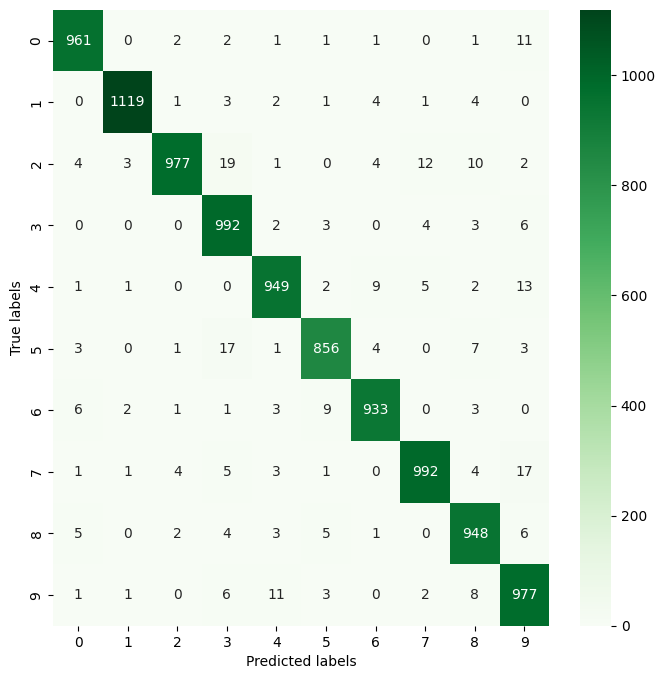

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Greens') #here fmt='d' means all values are integers
plt.ylabel('True labels')
plt.xlabel('Predicted labels')

###Building a predictive system

In [ ]:
def MNIST_DigitClassifier(input_image_path):

  #converting input to numpy array
  input_image = cv2.imread(input_image_path)

  #convert it to grayscale image
  input_grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
  plt.imshow(input_grayscale)

  #resizing the input image
  input_resized = cv2.resize(input_grayscale,(28,28))

  #scaling the values of image
  input_scaled = input_resized/255

  #reshaping input as we are predicting for one image only
  input_reshaped = np.reshape(input_scaled,[1,28,28])

  input_pred = model.predict(input_reshaped)

  #converting pred probability to class label
  input_pred_label = np.argmax(input_pred)

  print(input_pred_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2


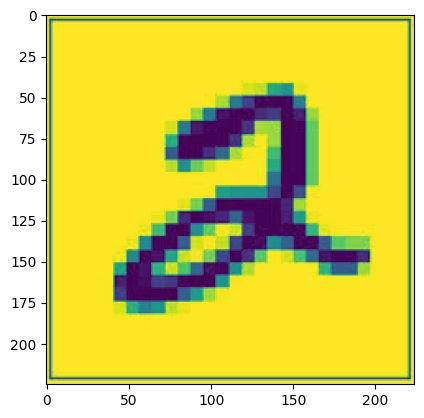

In [ ]:
img_path = '/content/images.jpg'
MNIST_DigitClassifier(img_path)